In [47]:
import pyflowbat as pfb
import numpy as np

In [48]:
my_wrkspc = pfb.pyflowbat.Workspace(full_output=True)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2312.
Date:                Wed, 31 May 2023   Prob (F-statistic):                    3.87e-11
Time:                        12:24:19   Log-Likelihood:                         -129.57
No. Observations:                   9   AIC:                                      261.1
Df Residuals:                       8   BIC:                                      261.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


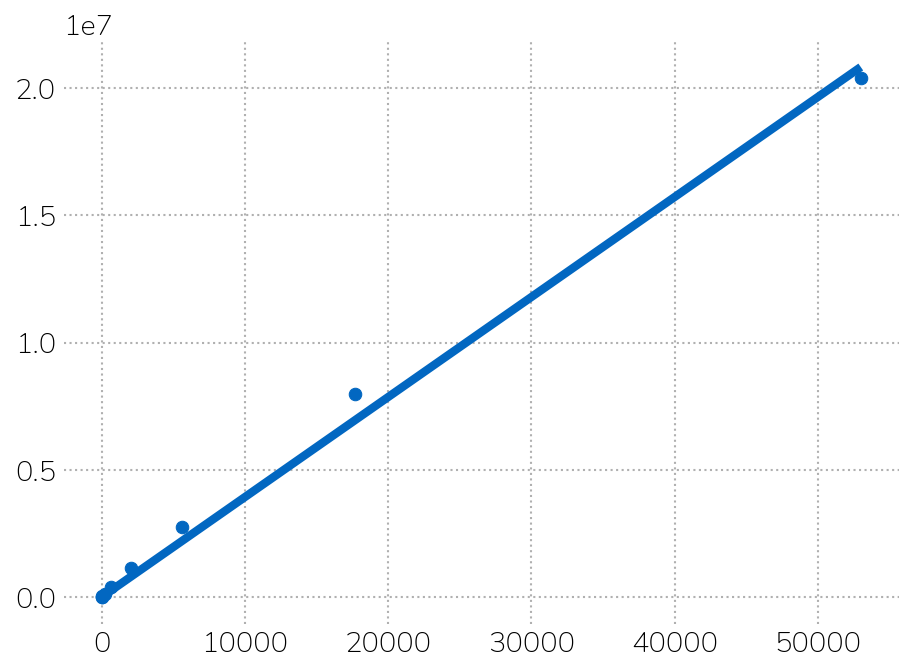

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9822.
Date:                Wed, 31 May 2023   Prob (F-statistic):                    1.20e-13
Time:                        12:24:19   Log-Likelihood:                         -115.14
No. Observations:                   9   AIC:                                      232.3
Df Residuals:                       8   BIC:                                      232.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


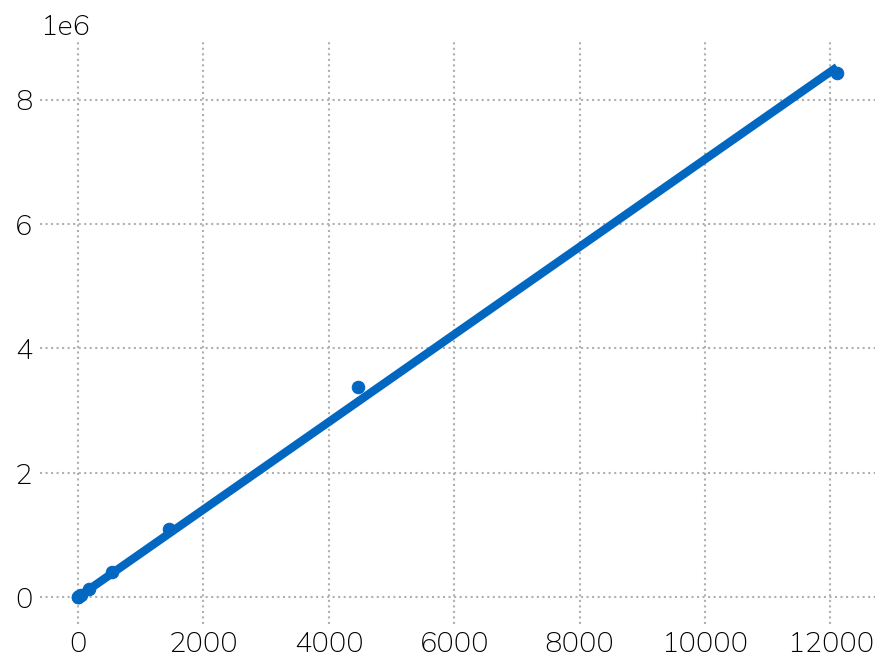

In [49]:
my_wrkspc.calculate_beads_factors("./example-data/Beads_After.fcs", [["PE-Texas Red-A", "MEPTRs"], ["FITC-A", "MEFLs"]], 9)

In [50]:
my_wrkspc.load_samples("raw", "./example-data/", lambda name: True if ('.fcs' in name and 'Beads' not in name) else False)

In [51]:
my_wrkspc.apply_gate('raw', 'heks', pfb.gating.gate_heks, {'method': 'same', 'samples': ['373_C_001.fcs', '664_D_002.fcs', '373_M_001.fcs']}, gate_type=2)

In [52]:
# i = 0
# for sample in my_wrkspc.sample_collections['raw']:
#     if i > 50:
#         break
#     print(sample)
#     my_wrkspc.visualize_plot_change("raw", sample, 'heks', sample, ["FSC-A", "SSC-A"])
#     i += 1

In [53]:
my_wrkspc.apply_gate('heks', 'singlets', pfb.gating.gate_singlets, {})

In [54]:
# i = 0
# for sample in my_wrkspc.sample_collections['heks']:
#     if i > 10:
#         break
#     print(sample)
#     my_wrkspc.visualize_plot_change("heks", sample, 'singlets', sample, ["FSC-A", "FSC-H"])
#     i += 1

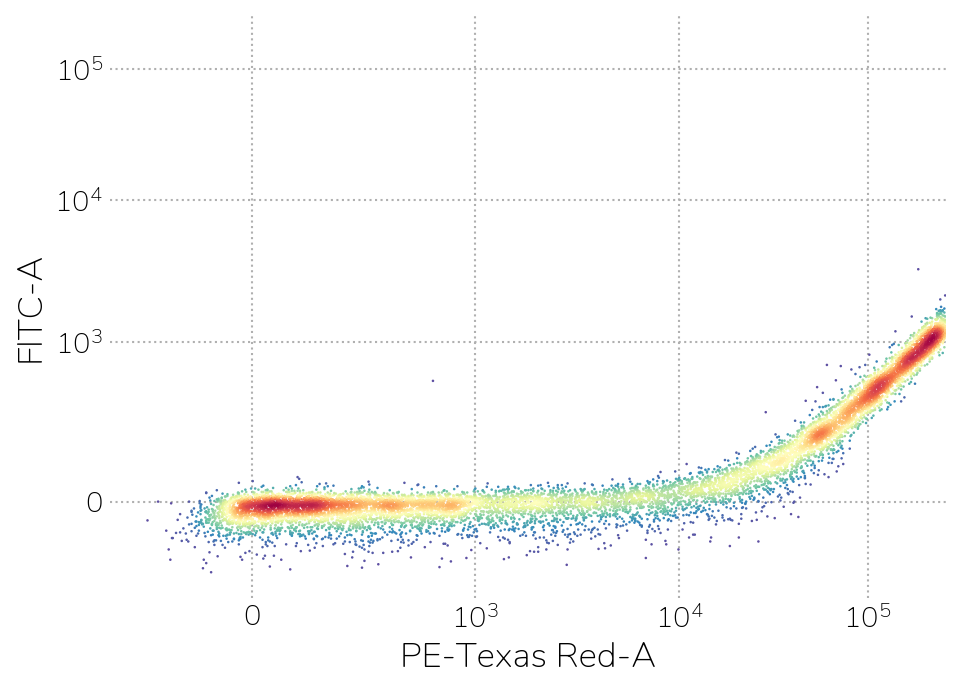

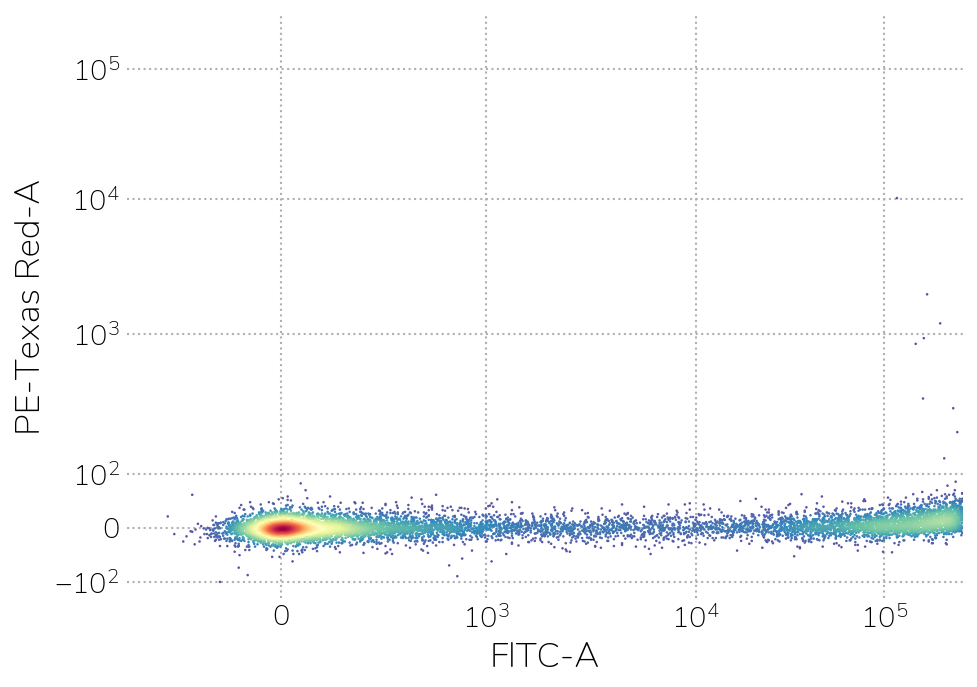

Iteration: 0
C:
[[1. 0.]
 [0. 1.]]

Errors: 0.00018193918, 0.0046502906



Iteration: 1
C:
[[ 1.00000000e+00 -1.81939176e-05]
 [-4.65029065e-04  1.00000000e+00]]

Errors: 0.00016374479, 0.004185262



Iteration: 2
C:
[[ 1.00000000e+00 -3.45683966e-05]
 [-8.83555273e-04  1.00000000e+00]]

Errors: 0.00014736985, 0.0037667356



Iteration: 3
C:
[[ 1.00000000e+00 -4.93053822e-05]
 [-1.26022883e-03  1.00000000e+00]]

Errors: 0.0001326325, 0.0033900626



Iteration: 4
C:
[[ 1.00000000e+00 -6.25686325e-05]
 [-1.59923511e-03  1.00000000e+00]]

Errors: 0.00011936892, 0.003051056



Iteration: 5
C:
[[ 1.00000000e+00 -7.45055240e-05]
 [-1.90434072e-03  1.00000000e+00]]

Errors: 0.000107431675, 0.002745951



Iteration: 6
C:
[[ 1.00000000e+00 -8.52486919e-05]
 [-2.17893583e-03  1.00000000e+00]]

Errors: 9.668824e-05, 0.0024713557



Iteration: 7
C:
[[ 1.00000000e+00 -9.49175164e-05]
 [-2.42607141e-03  1.00000000e+00]]

Errors: 8.701916e-05, 0.00222422



Iteration: 8
C:
[[ 1.00000000e+00 -1.036194

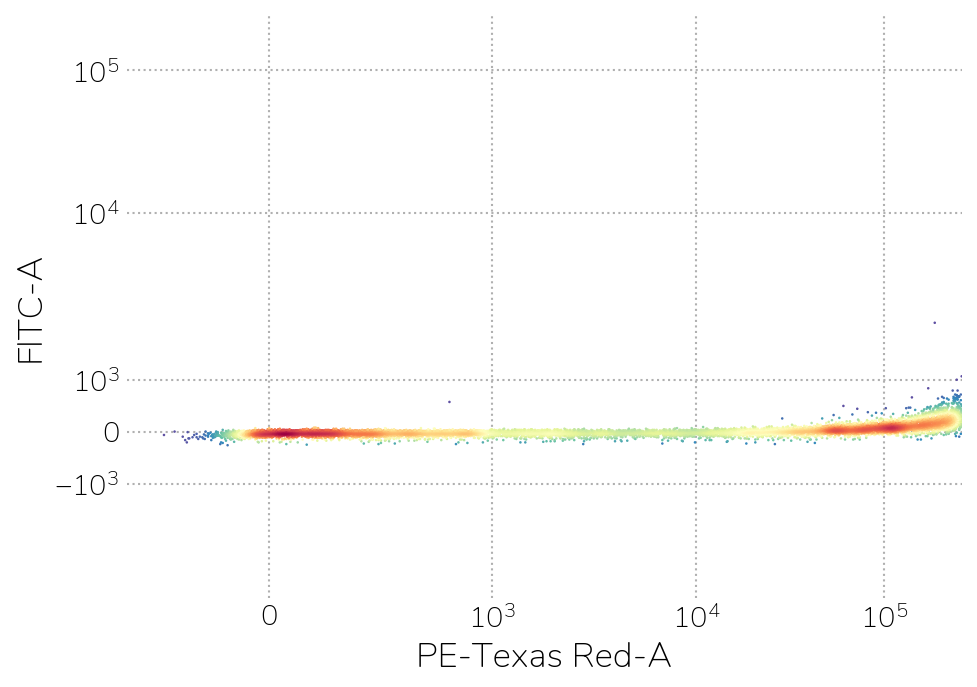

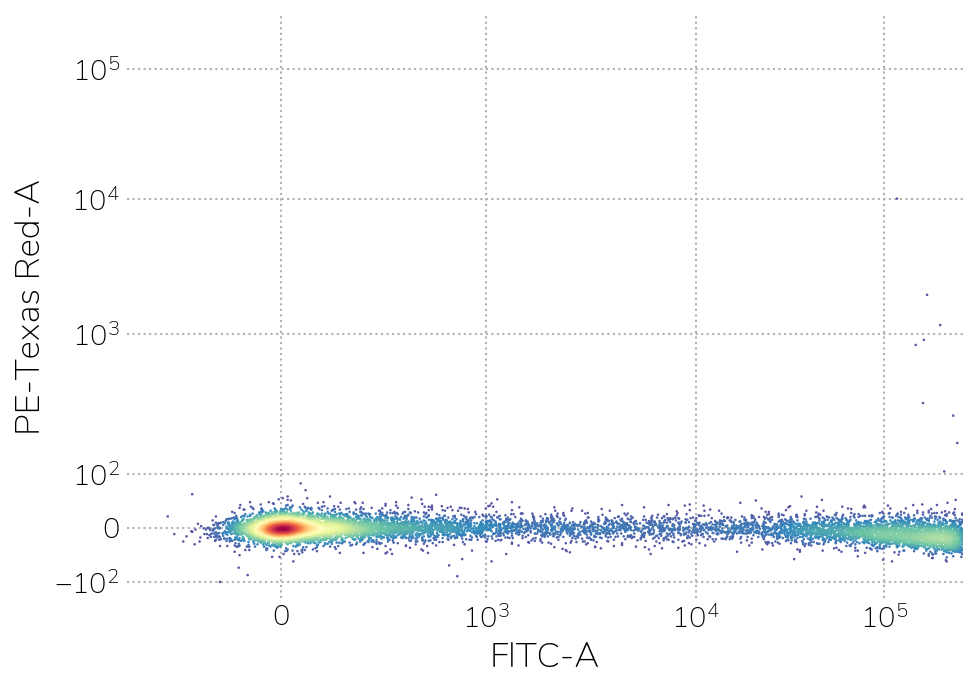

[[ 1.00000000e+00 -1.48223145e-04]
 [-3.78858280e-03  1.00000000e+00]]


In [55]:
my_wrkspc.calculate_compensation_matrix('singlets', ['Colors_DsRE2.fcs', 'Colors_mNG.fcs'], ['PE-Texas Red-A', 'FITC-A'], threshold=10**-3)

In [56]:
my_wrkspc.apply_compensation_matrix("singlets", "compensated")

In [57]:
my_wrkspc.apply_gate("compensated", "transfected", pfb.gating.gate_high_low, {"channel": "Alexa 750-A", "low": pfb.gating.find_percentile(my_wrkspc.sample_collections["compensated"]["Colors_Filler.fcs"], **{"channel": "Alexa 750-A", "percentile":99.5})})

In [58]:
pfb.gating.find_percentile(my_wrkspc.sample_collections["compensated"]["Colors_Filler.fcs"], **{"channel": "Alexa 750-A", "percentile":99.5})

1451.1196960449236

In [59]:
# i = 0
# for sample in my_wrkspc.sample_collections['raw']:
#     if i > 5:
#         break
#     print(sample)
#     my_wrkspc.visualize_plot_change("raw", sample, 'transfected', sample, ["PE-Texas Red-A", "FITC-A"])
#     i += 1

In [60]:
dox_conc = {
    'A':0,
    'B':10**0,
    'C':10**0.17,
    'D':10**0.33,
    'E':10**0.50,
    'F':10**0.63,
    'G':10**0.75,
    'H':10**0.88,
    'I':10**1.0,
    'J':10**1.08,
    'K':10**1.25,
    'L':10**1.33,
    'M':10**1.50,
    'N':10**1.75,
    'O':10**2.0,
    'P':10**3.0
}

In [61]:
my_wrkspc.extract_statistics('transfected', 'samples', lambda name: True if (('Beads' not in name and 'Controls' not in name and 'Colors' not in name) and '.fcs' in name) else False,
    [
        ['line', lambda file_name, fcs_data: (file_name.split("_"))[0]],
        ['sample', lambda file_name, fcs_data: (file_name.split("_"))[2]],
        ['dox_conc', lambda file_name, fcs_data: dox_conc[(file_name.split("_"))[1]]],
        ['Mean FITC-A', lambda file_name, fcs_data: np.mean(fcs_data[:, 'FITC-A'])],
        ['Mean PE-Texas Red-A', lambda file_name, fcs_data: np.mean(fcs_data[:, 'PE-Texas Red-A'])]
    ]
)

In [62]:
my_wrkspc.stats_collections["samples"]

,line,sample,dox_conc,Mean FITC-A,Mean PE-Texas Red-A
0,373,001.fcs,0.0,29.190813,0.931235
1,373,002.fcs,0.0,27.861300,0.977204
2,373,003.fcs,0.0,27.867571,1.112749
3,373,001.fcs,1.0,62.378334,1.072419
4,373,002.fcs,1.0,62.283600,1.033922
...,...,...,...,...,...
474,672,002.fcs,100.0,11796.842773,1125.300049
475,672,003.fcs,100.0,11706.761719,1059.867920
476,672,001.fcs,1000.0,12230.451172,976.514893
477,672,002.fcs,1000.0,12426.958984,983.141724


In [63]:
my_wrkspc.combine_replicates('samples', 'samples combined',
    lambda row: [row['dox_conc'], row['line']],
    [
        ['CellLine', lambda row: row['line'], False],
        ['DoxConc', lambda row: row['dox_conc'], False],
        ['Mean FITC-A', lambda row: row['Mean FITC-A'], True],
        ['Mean PE-Texas Red-A', lambda row: row['Mean PE-Texas Red-A'], True],
        ['MEFLs', lambda x: 0, True],
        ['MEPTRs', lambda x: 0, True]
    ]
)

In [64]:
my_wrkspc.stats_collections["samples combined"]

,CellLine,DoxConc,Mean FITC-A,Mean PE-Texas Red-A,MEFLs,MEPTRs,Mean FITC-A_stdErr,Mean PE-Texas Red-A_stdErr,MEFLs_stdErr,MEPTRs_stdErr,
0,373,0.000000,28.306562,1.007063,0.0,0.0,0.442130,0.054484,0.0,0.0,
1,373,1.000000,62.630947,1.074449,0.0,0.0,0.301224,0.024006,0.0,0.0,
2,373,1.479108,112.652161,0.984089,0.0,0.0,2.355863,0.088105,0.0,0.0,
3,373,2.137962,229.001724,0.917835,0.0,0.0,4.495694,0.135975,0.0,0.0,
4,373,3.162278,684.670898,0.956249,0.0,0.0,14.030722,0.080178,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...
155,672,21.379621,9489.560547,729.906433,0.0,0.0,164.730640,22.755922,0.0,0.0,
156,672,31.622777,10841.657227,971.870911,0.0,0.0,112.292231,9.668788,0.0,0.0,
157,672,56.234133,11395.363281,1106.404907,0.0,0.0,89.787878,12.950850,0.0,0.0,
158,672,100.000000,11770.066406,1089.716064,0.0,0.0,31.777287,19.105111,0.0,0.0,


In [70]:
my_wrkspc.apply_operation('samples combined', 'samples converted', 
    [
        ['Mean FITC-A', lambda row, inputs: max(row['Mean FITC-A'], 0)],
        ['Mean PE-Texas Red-A', lambda row, inputs: max(row['Mean PE-Texas Red-A'], 0)],
        ['MEFLs', lambda row, inputs: row['Mean FITC-A']*my_wrkspc.conversion_factors["FITC-A"]],
        ['MEFLs_stdErr', lambda row, inputs: row['Mean FITC-A']*my_wrkspc.conversion_factors["FITC-A"] * np.sqrt((row['Mean FITC-A_stdErr']/row['Mean FITC-A'])**2+(my_wrkspc.conversion_factors["FITC-A_stderr"]/my_wrkspc.conversion_factors["FITC-A"])**2)],
        ['MEPTRs', lambda row, inputs: row['Mean PE-Texas Red-A']*my_wrkspc.conversion_factors["PE-Texas Red-A"]],
        ['MEPTRs_stdErr', lambda row, inputs: row['Mean PE-Texas Red-A']*my_wrkspc.conversion_factors["PE-Texas Red-A"] * np.sqrt((row['Mean PE-Texas Red-A_stdErr']/row['Mean PE-Texas Red-A'])**2+(my_wrkspc.conversion_factors["PE-Texas Red-A_stderr"]/my_wrkspc.conversion_factors["PE-Texas Red-A"])**2)]
    ], []
)

/var/folders/xp/_3hjw4k934s_541frmhxbff00000gn/T/ipykernel_50039/2581900809.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  ['MEPTRs_stdErr', lambda row, inputs: row['Mean PE-Texas Red-A']*my_wrkspc.conversion_factors["PE-Texas Red-A"] * np.sqrt((row['Mean PE-Texas Red-A_stdErr']/row['Mean PE-Texas Red-A'])**2+(my_wrkspc.conversion_factors["PE-Texas Red-A_stderr"]/my_wrkspc.conversion_factors["PE-Texas Red-A"])**2)]
/var/folders/xp/_3hjw4k934s_541frmhxbff00000gn/T/ipykernel_50039/2581900809.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  ['MEPTRs_stdErr', lambda row, inputs: row['Mean PE-Texas Red-A']*my_wrkspc.conversion_factors["PE-Texas Red-A"] * np.sqrt((row['Mean PE-Texas Red-A_stdErr']/row['Mean PE-Texas Red-A'])**2+(my_wrkspc.conversion_factors["PE-Texas Red-A_stderr"]/my_wrkspc.conversion_factors["PE-Texas Red-A"])**2)]


In [71]:
min(my_wrkspc.stats_collections["samples converted"]['Mean PE-Texas Red-A'])

0.0

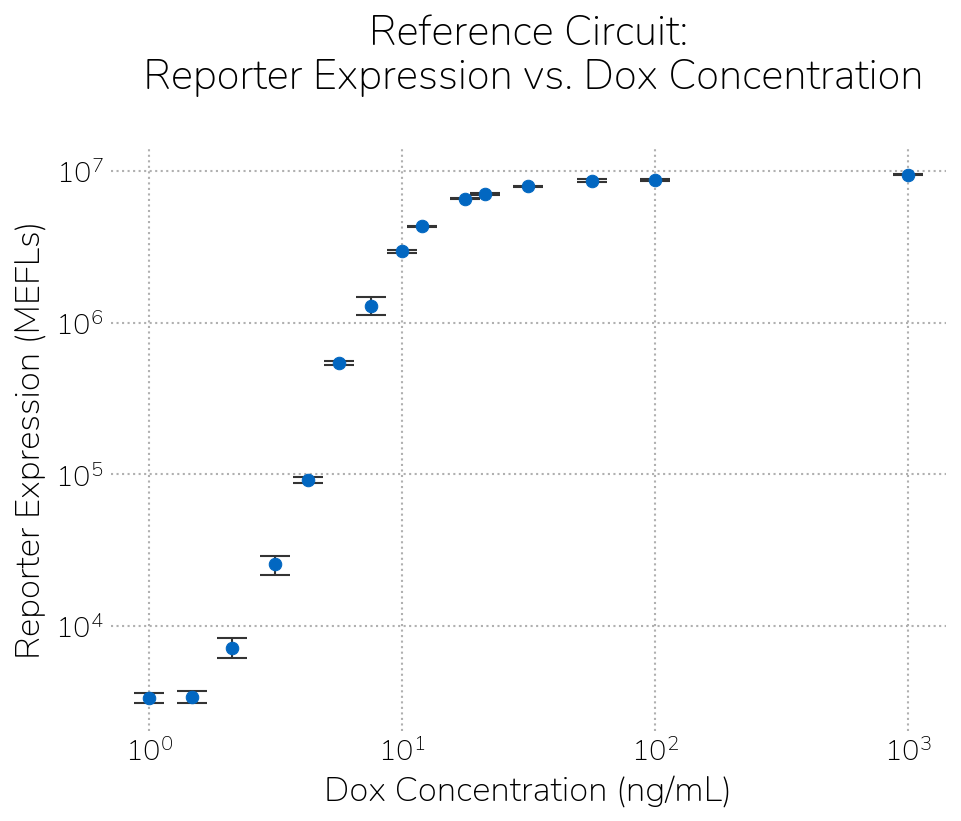

In [72]:
my_wrkspc.graph_statistics(
    [
        ["samples converted", 'DoxConc', 'MEFLs', ['CellLine', '664']]
    ],
    errors=[False, True],
    legend=None,
    title="Reference Circuit:\n Reporter Expression vs. Dox Concentration",
    labels=["Dox Concentration (ng/mL)", "Reporter Expression (MEFLs)"],
    xlog=True,
    ylog=True,
    save=True
)

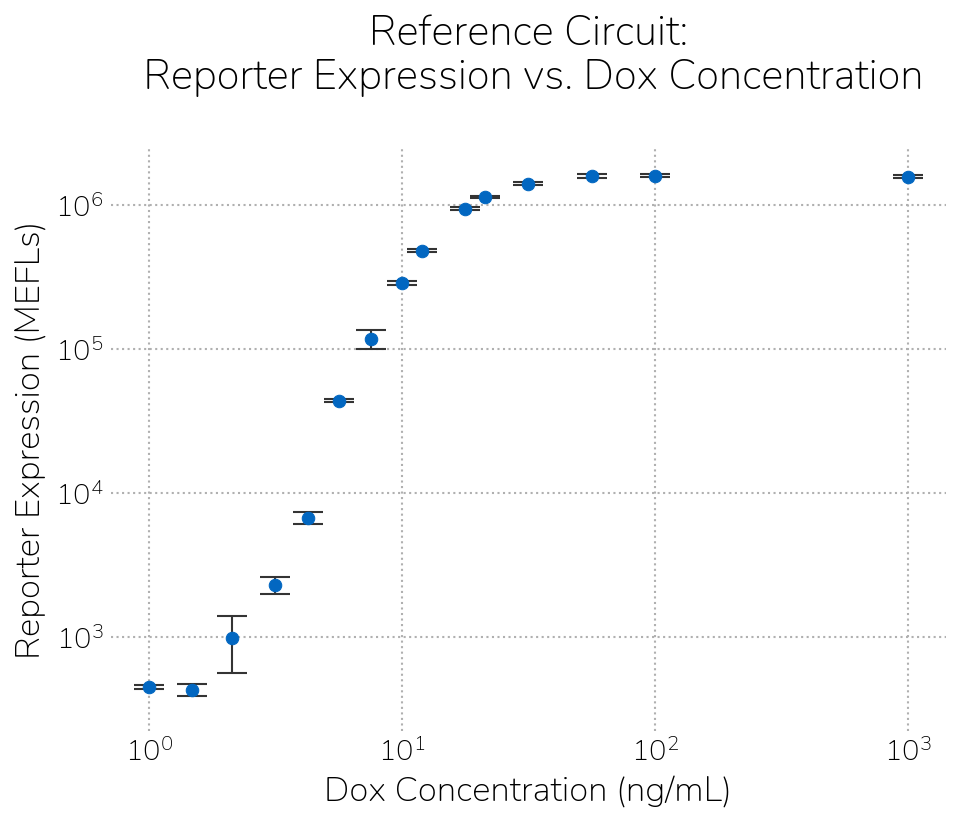

In [73]:
my_wrkspc.graph_statistics(
    [
        ["samples converted", 'DoxConc', 'MEPTRs', ['CellLine', '664']]
    ],
    errors=[False, True],
    legend=None,
    title="Reference Circuit:\n Reporter Expression vs. Dox Concentration",
    labels=["Dox Concentration (ng/mL)", "Reporter Expression (MEFLs)"],
    xlog=True,
    ylog=True,
    save=True
)

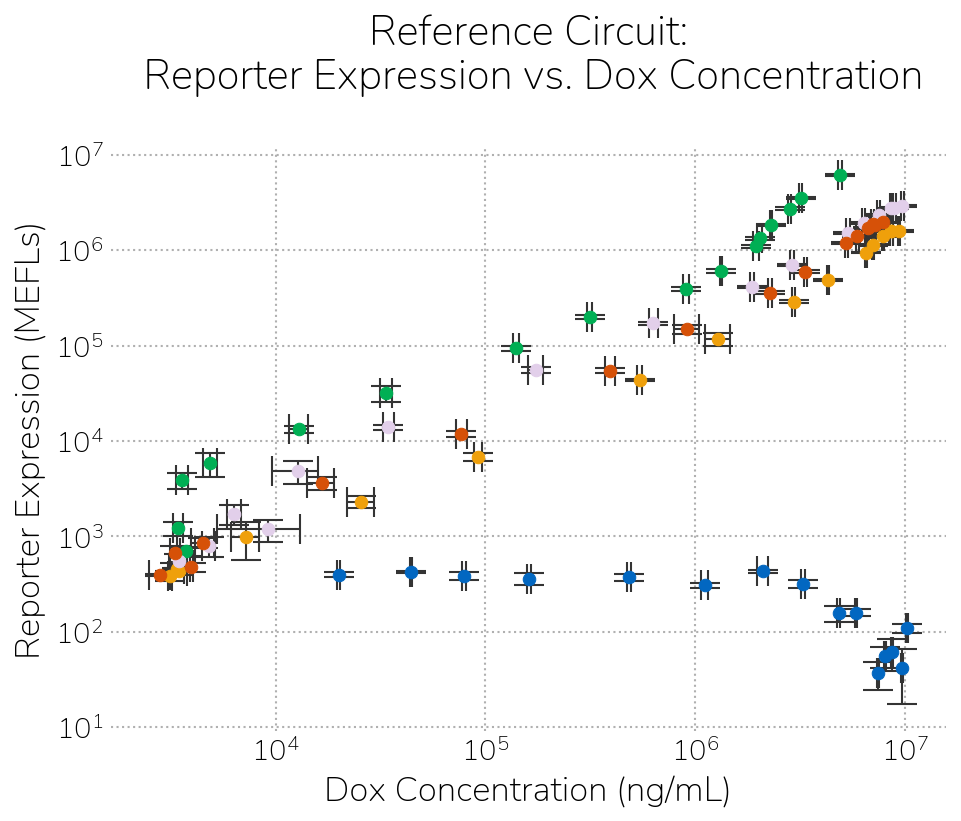

In [74]:
my_wrkspc.graph_statistics(
    [
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '373']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '664']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '665']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '666']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '667']]
    ],
    errors=[True, True],
    legend=["no synTF", "VP64", "VPR", "p65", "p65trunc2"],
    title="ZF1:\n MEPTRs vs. MEFLs",
    labels=["Dox Concentration (ng/mL)", "Reporter Expression (MEFLs)"],
    xlog=True,
    ylog=True,
    save=True
)

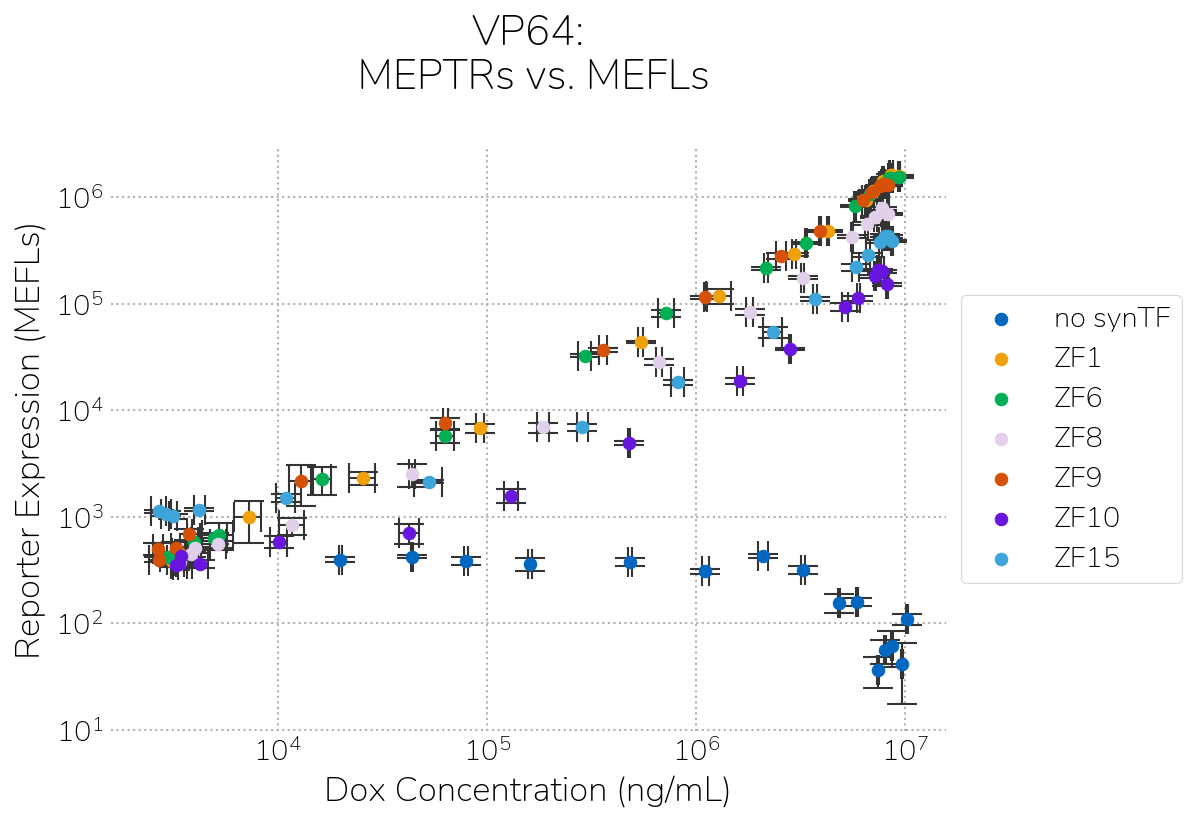

In [75]:
my_wrkspc.graph_statistics(
    [
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '373']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '664']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '668']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '669']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '670']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '671']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['CellLine', '672']]
    ],
    errors=[True, True],
    legend=["no synTF", "ZF1", "ZF6", "ZF8", "ZF9", "ZF10", "ZF15"],
    title="VP64:\n MEPTRs vs. MEFLs",
    labels=["Dox Concentration (ng/mL)", "Reporter Expression (MEFLs)"],
    xlog=True,
    ylog=True,
    save=True
)